# Investment Analysis Assignment


## Project Brief
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

 

## Business and Data Understanding
Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment

2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.


- For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

- You may use this list: Click here for a list of countries where English is an official language.

These conditions will give you sufficient information for your initial analysis. Before getting to specific questions, let’s understand the problem and the data first.

 

### 1. What is the strategy?

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.

 

### 2. Where did we get the data from? 

We have taken real investment data from crunchbase.com, so the insights you get may be incredibly useful. For this assignment, we have divided the data into the following files:

 

You have to use three main data tables for the entire analysis (available for download on the next page):

 

### 3. What is Spark Funds’ business objective?

The business objectives and goals of data analysis are pretty straightforward.

**Business objective**: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Goals of data analysis: Your goals are divided into three sub-goals:<br/>
**Investment type analysis**: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.<br/>
**Sector analysis**: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

# Solution :

Import libraries required for building solution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy import mean

## Read Companies and Rounds 2 Datasets
Read *Companies* and *rounds2* dataset using ISO-8859-1 encoding

In [2]:
companies = pd.read_csv(r"C:\JatinDrive\Personal\Study\UPGRAD\InferentialStatistics\Assignment\companies.txt",sep = '\t',  encoding = 'ISO-8859-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2 = pd.read_csv(r"C:\JatinDrive\Personal\Study\UPGRAD\InferentialStatistics\Assignment\rounds2.csv", encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Table 1.1 - Understand the Data Set 
### Analyze the *Companies* and *rounds2* data

** QQ : In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column. **

Observations from Companies dataset:
1. There are 66368 records in companies dataset.
2. permalink can be considered as unique value representing the record. 
3. Name cannot be considered as unique value representing the record as there are duplicate names in multiple records.

In [4]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Datawiz-Io,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [5]:
companies.shape

(66368, 10)

Companies can be considered as Unique only when they have unique permalink. Name cannot be considered as unique since 2 companies may have same name with different permalink

In [6]:
len(companies.name.unique())

66103

**QQ : How many unique companies are present in the companies file? **

In [7]:
len(companies.permalink.unique())

66368

Observations from rounds2 dataset:
1. There are 114949 records in rounds2 dataset.
2. Funding round code has only 31140 records and all other records have null values for this column

In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
rounds2.shape

(114949, 6)

**QQ How many unique companies are present in rounds2?**

In [10]:
len(rounds2['company_permalink'].unique())

90247

## Data Preparation

In order to merge the companies and rounds2 dataset, we need to have permanlink and company_permalink in same case (upper/lower) before we can merge both datasets on these columns

In [11]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

Perform Inner join on Rounds 2 with companies dataset and verify the total no. of records post merge

In [12]:
commonPermalink = rounds2.merge(companies,left_on="company_permalink", right_on="permalink")
commonPermalink.shape

(114942, 16)

** QQ : Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N. ** <br/><br/>
As per the shape of merged datasets, there are 114942 records where as company dataset had 114949 records. That means there are 7 records which are not part of the rounds2 dataframe as we have done merge on company_permalink column.

Here is the list of rounds2 companies which are not present in companies dataset.

In [13]:
rounds2[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


Add companies data to the rounds2 to dataset. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.

In [14]:
master_frame = pd.merge(rounds2,companies, how="left", left_on="company_permalink", right_on="permalink")
master_frame.drop('permalink', axis=1, inplace=True)
master_frame['funding_round_type'] = master_frame['funding_round_type'].str.lower()

In [15]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


** QQ : How many observations are present in master_frame ? **

In [16]:
master_frame.shape

(114949, 15)

In [17]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


Check the investment amount column values *Raised amount USD*.
1. 75% vaues of investment amount is under 7e+06 .
2. Maximum value of investment is 2.127e+10
3. Minimum value of invetsment is 0

**Clearly there are outliers in the dataset which will be impacting the distribution of the investment amount.**

In [18]:
master_frame.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


Find the unique funding round types in master dataframe

In [19]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

Filter out the records from master dataframe where investment type is in **"venture" , "seed", "angel", "private_equity"**<br/>Check the number of records with different funding type

In [20]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','seed', 'angel', 'private_equity' ])]
master_frame.dropna(subset=['raised_amount_usd'], inplace=True)

In [21]:
master_frame[master_frame.funding_round_type == 'seed'].shape

(23603, 15)

In [22]:
master_frame[master_frame.funding_round_type == 'venture'].shape

(50228, 15)

In [23]:
master_frame[master_frame.funding_round_type == 'angel'].shape

(4860, 15)

In [24]:
master_frame[master_frame.funding_round_type == 'private_equity'].shape

(1936, 15)

## Data Visualization
## Table 2.1 - Average Values of Investments for Each of these Funding Types

How distribution looks like for different categories of funding round type with Raised amount for each funding type ?? <br/>
Lets do a box plot for bivariate variables **"Funding round type", "Raised amount USD"** <br/><br/><br/>
Observations:
 - There are outliers for each funding round type
 - We may have to look at it again by using the log scale on y axis

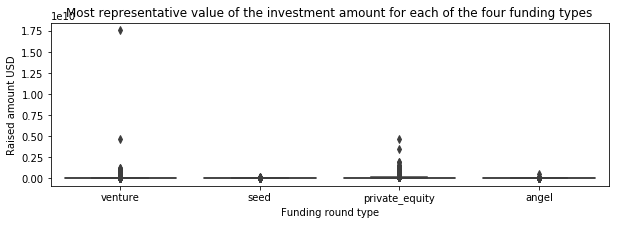

In [25]:
plt.figure(figsize=(10,3))

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data= master_frame)

plt.xlabel('Funding round type')
plt.ylabel('Raised amount USD')
plt.title('Most representative value of the investment amount for each of the four funding types')

plt.show()

Log scale is proving a better view w.r.t 
 - Outliers for each funding round type. Venture has a few very high value investments.
 - Private equity gets the most investments among the 4 funding round type.
 - Raised amount for seed has a wider range then angel

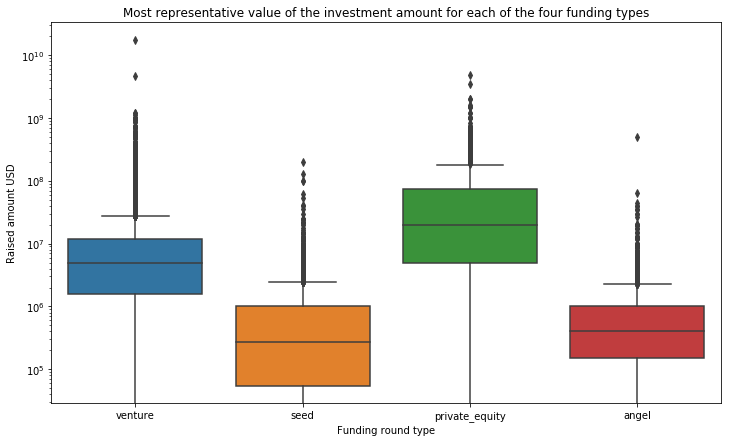

In [26]:
plt.figure(figsize=(12,7))

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data= master_frame)
plt.yscale('log')
plt.xlabel('Funding round type')
plt.ylabel('Raised amount USD')

plt.title('Most representative value of the investment amount for each of the four funding types')

plt.show()

Lets have a look at the distribution of tha raised amount against each of the 4 funding round types:
 - Venture
 - Seed
 - Private Equity
 - Angel

In [27]:
ventureRaisedAmount = master_frame[master_frame.funding_round_type == 'venture']['raised_amount_usd']
ventureRaisedAmount.dropna(inplace=True)

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


We can clearly see the impact of outliers on the distribution of raised amount for Venture funding round. Distribution is left skewed due to these outliers.

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


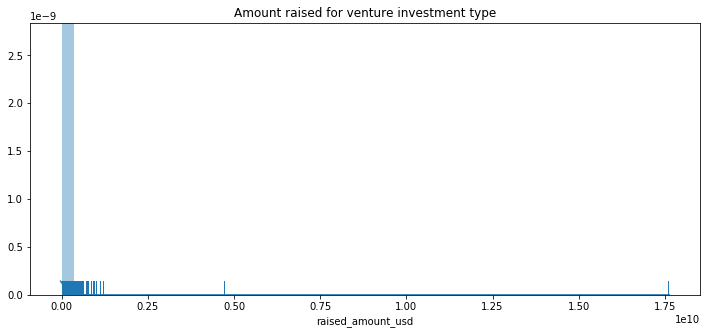

In [28]:
plt.figure(figsize=(12,5))

sns.distplot(ventureRaisedAmount, rug=True)
plt.title("Amount raised for venture investment type")
plt.show()

In [29]:
seedRaisedAmount = master_frame[master_frame.funding_round_type == 'seed']['raised_amount_usd']
seedRaisedAmount.dropna(inplace=True)

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


We can clearly see the impact of outliers on the distribution of raised amount for Seed funding round. Distribution is left skewed due to these outliers.

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


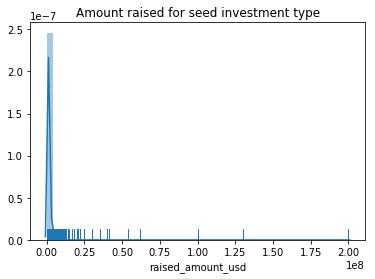

In [30]:
sns.distplot(seedRaisedAmount, rug=True)
plt.title("Amount raised for seed investment type")
plt.show()

In [31]:
privateEquityRaisedAmount = master_frame[master_frame.funding_round_type == 'private_equity']['raised_amount_usd']
privateEquityRaisedAmount.dropna(inplace=True)

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


We can clearly see the impact of outliers on the distribution of raised amount for Private Equity funding round. Distribution is left skewed due to these outliers.

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


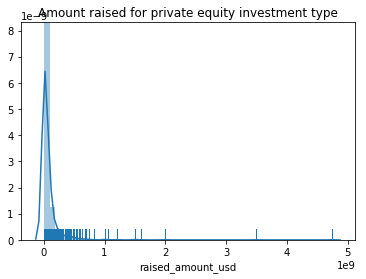

In [32]:
sns.distplot(privateEquityRaisedAmount, rug=True)
plt.title("Amount raised for private equity investment type")
plt.show()

In [33]:
angelRaisedAmount = master_frame[master_frame.funding_round_type == 'angel']['raised_amount_usd']
angelRaisedAmount.dropna(inplace=True)

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3893: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


We can clearly see the impact of outliers on the distribution of raised amount for Angel funding round. Distribution is left skewed due to these outliers.

C:\Users\jatsharm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


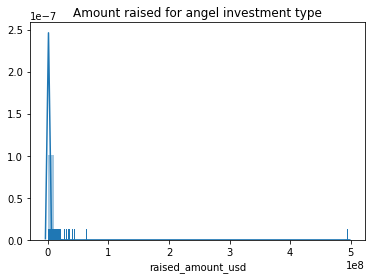

In [34]:
sns.distplot(angelRaisedAmount, rug=True)
plt.title("Amount raised for angel investment type")
plt.show()

** QQ : Average funding amount of venture type ?**

In [35]:
#Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1
ventureMean = master_frame[master_frame.funding_round_type == 'venture']['raised_amount_usd'].mean()
ventureMean

11748949.129489528

As the data is left skewed we can observe the difference in mean and median values. Since question is asked about average values hence mean is used.

In [36]:
ventureMedian = master_frame[master_frame.funding_round_type == 'venture']['raised_amount_usd'].median()
ventureMedian

5000000.0

** QQ : Average funding amount of angel type ?? **

In [37]:
angelMean = master_frame[master_frame.funding_round_type == 'angel']['raised_amount_usd'].mean()
angelMean

958694.4697530865

As the data is left skewed we can observe the difference in mean and median values. Since question is asked about average values hence mean is used.

In [38]:
angelMedian = master_frame[master_frame.funding_round_type == 'angel']['raised_amount_usd'].median()
angelMedian

400000.0

** QQ : Average funding amount of seed type ?? **

In [39]:
seedMean = master_frame[master_frame.funding_round_type == 'seed']['raised_amount_usd'].mean()
seedMean

719817.9969071728

As the data is left skewed we can observe the difference in mean and median values. Since question is asked about average values hence mean is used.

In [40]:
seedMedian = master_frame[master_frame.funding_round_type == 'seed']['raised_amount_usd'].median()
seedMedian

275000.0

** QQ : Average funding amount of private equity type ?? ** 

In [41]:
privateEquityMean = master_frame[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'].mean()
privateEquityMean

73308593.02944215

As the data is left skewed we can observe the difference in mean and median values. Since question is asked about average values hence mean is used.

In [42]:
privateEquityMedian = master_frame[master_frame.funding_round_type == 'private_equity']['raised_amount_usd'].median()
privateEquityMedian

20000000.0

## Table 3.1 - Analysing the Top 3 English-Speaking Countries

Wiki link for Data scraping - https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

In [43]:
import urllib.request
import requests
from bs4 import BeautifulSoup

Using beautiful soup for Data Scraping from Wikipedia

In [44]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language').text
soup = BeautifulSoup(website_url,'lxml')
tables = soup.findAll('table',{'class':'wikitable sortable'})

In [45]:
#List to hold the name of the country and country codes
country_code = []
country= []

#Iterate on tables and find the countries and country codes
for table in tables:
    if (len(table) >1):
        rows = table.find_all('tr')
        
        #Skip the first row, which is the name of the columns
        for row in rows[1:]:
            cells = row.find_all('td')
            countryName = cells[1].text.strip()
            country_code_Name = cells[2].text.strip()
            
                
            #If country is already in the dictionary
            #add to the existing sun hours of that country and the count to keep track of how many times we add
            if countryName not in country:
                country_code.append(country_code_Name)
                country.append(countryName)

As per Wikipedia tables, first 3 tables have list of countries where English is an official language. It comes to be first 76 countries in the dataframe obtained

In [46]:
countryDF = pd.DataFrame()
countryDF['Country'] = country
countryDF['country_code'] = country_code
countryDF = countryDF[0:76]
countryDF.head()

,Country,country_code
0,Australia,AUS
1,New Zealand[1],NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda[2],ATG


As you may have observed above there is a need to clean up the country names.

In [47]:
def countryCleanup(name):
    index = name.find("[")
    if(index != -1):
        return name[:index]
    else:
        return name
        
countryDF['Country'] = countryDF['Country'].apply(countryCleanup)
countryDF

,Country,country_code
0,Australia,AUS
1,New Zealand,NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda,ATG
5,Bahamas,BHS
6,Barbados,BRB
7,Belize,BLZ
8,Botswana,BWA
9,Burundi,BDI


If you have a look at the countries from index 60 to 75, you will find countries have missing codes. We need to update these records with correct values and we will have our final dataframe ready.

In [48]:
countryDF.loc[countryDF.Country=='Bahrain', 'country_code'] = 'BHN'
countryDF.loc[countryDF.Country=='Bangladesh', 'country_code'] = 'BGD'
countryDF.loc[countryDF.Country=='Brunei', 'country_code'] = 'BRN'
countryDF.loc[countryDF.Country=='Cyprus', 'country_code'] = 'CYP'
countryDF.loc[countryDF.Country=='Eritrea', 'country_code'] = 'ERI'
countryDF.loc[countryDF.Country=='Ethiopia', 'country_code'] = 'ETH'
countryDF.loc[countryDF.Country=='Israel', 'country_code'] = 'ISR'
countryDF.loc[countryDF.Country=='Jordan', 'country_code'] = 'JOR'
countryDF.loc[countryDF.Country=='Kuwait', 'country_code'] = 'KWT'
countryDF.loc[countryDF.Country=='Malaysia', 'country_code'] = 'MYS'
countryDF.loc[countryDF.Country=='Maldives', 'country_code'] = 'MDV'
countryDF.loc[countryDF.Country=='Myanmar', 'country_code'] = 'MMR'
countryDF.loc[countryDF.Country=='Oman', 'country_code'] = 'OMN'
countryDF.loc[countryDF.Country=='Qatar', 'country_code'] = 'QAT'
countryDF.loc[countryDF.Country=='Sri Lanka', 'country_code'] = 'LKA'
countryDF.loc[countryDF.Country=='United Arab Emirates', 'country_code'] = 'ARE'
countryDF

,Country,country_code
0,Australia,AUS
1,New Zealand,NZL
2,United Kingdom,GBR
3,United States,USA
4,Antigua and Barbuda,ATG
5,Bahamas,BHS
6,Barbados,BRB
7,Belize,BLZ
8,Botswana,BWA
9,Burundi,BDI


In [49]:
top9 = pd.merge(master_frame, countryDF, how="inner", on ="country_code")

### Outliers detection and removal
The Chosen investment type for Spark Funds was Venture and we had observed that there were a lot of outliers for Venture funding round type. Lets remove these outliers to get a better sense of the investments.

Also if investment amount is null/nan, it doesnt make sense to have the record in our dataframe. Lets get rid of these records as well.

In [50]:
top9 = top9[top9.funding_round_type =='venture']
top9.shape

(41927, 16)

There are total 3045 records where raised investment amount is missing.

In [51]:
top9['raised_amount_usd'].isnull().sum()

0

Outliers can be described as values which are 1.5 time above and below the Inter Quartile range(IQR). This can be calculated by finding the difference out 25% (1st quartlie) and 75% (3rd quartile).

In [52]:
Q1 = top9['raised_amount_usd'].quantile(0.25)
Q3 = top9['raised_amount_usd'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10400000.0


After removing the null/nan/outliers from data, we have 38433 records left.

In [53]:
top9 = top9[(top9['raised_amount_usd'] > (Q1 - 1.5 * IQR)) & (top9['raised_amount_usd'] < (Q3 + 1.5 * IQR))]
top9.shape

(38433, 16)

In [54]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,India
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,India
2,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,India
4,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India
5,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,01-08-2010,825000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India


Lets see how the investment amount distribution looks like for Venture Funding round type

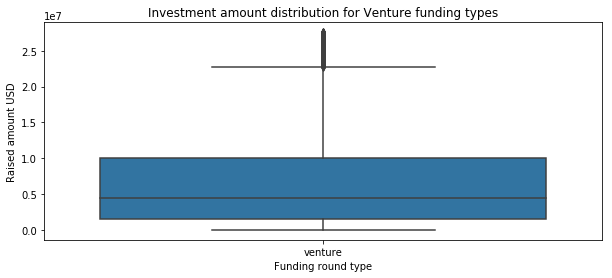

In [55]:
plt.figure(figsize=(10,4))

sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=top9)
plt.xlabel('Funding round type')
plt.ylabel('Raised amount USD')
plt.title('Investment amount distribution for Venture funding types')
plt.show()

Lets have a look at the countries where venture investments have happened.

In [56]:
top9.Country.unique()

array(['India', 'United States', 'Canada', 'United Kingdom', 'Australia',
       'Ireland', 'Israel', 'Singapore', 'Jordan', 'Nigeria',
       'New Zealand', 'Cyprus', 'Kenya', 'South Africa', 'Philippines',
       'Malaysia', 'Uganda', 'United Arab Emirates', 'Pakistan',
       'Bangladesh', 'Ghana', 'Trinidad and Tobago', 'Cameroon',
       'Botswana', 'Malta', 'Mauritius', 'Myanmar',
       'Saint Kitts and Nevis', 'Kuwait'], dtype=object)

** QQ : For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received) **

In [57]:
top9.groupby(by=['country_code']).sum().sort_values(by=['raised_amount_usd'], ascending=False)[0:9]

,raised_amount_usd
country_code,
USA,2.158499e+11
GBR,1.142338e+10
CAN,6.756630e+09
IND,5.654659e+09
ISR,5.393015e+09
IRL,1.205988e+09
SGP,1.119768e+09
AUS,9.532580e+08
NZL,2.323164e+08


Based on the above analysis, top 3 countries with highest investment in venture funding type investments are 
 - United States (USA)
 - United Kingdom (GBR)
 - Canada (CAN)

## Table 5.1 - Sector-wise Investment Analysis

## Sector Analysis 1

Read the mapping dataset

In [58]:
sector_mapping = pd.read_csv(r"C:\JatinDrive\Personal\Study\UPGRAD\InferentialStatistics\Assignment\mapping.csv", encoding="ISO-8859-1'")
sector_mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


On close observations on category_list column it seems 'na' got replaced with 0 values. eg. Veteri0ry	,A0lytics.
We need to correct this data as it may not match with category list in master_frame.

In [59]:
sector_mapping['category_list'] = sector_mapping['category_list'].str.replace('0', 'na')
sector_mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


Define a function to identify primary sector from the category list.<br/>
** Business Rule - the first string before the vertical bar will be considered the primary sector **

In [60]:
def findPrimarySector(sectorName):
    sectorName = str(sectorName)
    index = sectorName.find("|")
    if(index != -1):
        return sectorName[:index].lower()
    else:
        return sectorName.lower()

Extract the primary sector of each category list from the category_list column

In [61]:
top9['primary_sector'] = top9['category_list'].apply(findPrimarySector)
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,India,media
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,India,e-commerce
2,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,India,edtech
4,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India,3d
5,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,01-08-2010,825000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India,3d


Using the mapping dataset, map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [62]:
sector_mapping["main_sector"] = pd.DataFrame(pd.get_dummies(sector_mapping).idxmax(1))
sector_mapping.drop(sector_mapping.columns[1:10], axis = 1, inplace = True)
sector_mapping["category_list"] = sector_mapping["category_list"].str.lower()

In [63]:
sector_mapping.head()

,category_list,main_sector
0,NaN,Blanks
1,3d,Manufacturing
2,3d printing,Manufacturing
3,3d technology,Manufacturing
4,accounting,"Social, Finance, Analytics, Advertising"


Check the shape of both dataframes (top9 and sectr_mapping) before merging

In [64]:
top9.shape

(38433, 17)

In [65]:
sector_mapping.shape

(688, 2)

Perform left join on top9 dataframe with sector_mapping dataframe. Drop the additional columns due to merge and rename to original column names.<br/> ** This will be our final dataframe.**

In [66]:
final_main_frame = pd.merge(top9,sector_mapping, how="left", left_on="primary_sector", right_on="category_list")
final_main_frame.drop("category_list_y", axis=1, inplace=True)
final_main_frame = final_main_frame.rename(columns={'category_list_x': 'category_list'})

 Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [67]:
final_main_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,India,media,Entertainment
1,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,21Diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,India,e-commerce,Others
2,/organization/247-learning-private,/funding-round/4cd5cd165bc869bc40705a9e4b626bee,venture,NaN,06-11-2007,4000000.0,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,India,edtech,Others
3,/organization/3dsoc,/funding-round/bbedf1410fddeed341018583bbd0ca1e,venture,A,01-12-2007,1240000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India,3d,Manufacturing
4,/organization/3dsoc,/funding-round/da8918e533a7caf0df0dc8d3f506c0f8,venture,B,01-08-2010,825000.0,3DSoC,http://www.3dsoc.com,3D|Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2006,India,3d,Manufacturing


As expected resulted dataframe has same shape

In [68]:
final_main_frame.shape

(38433, 18)

Validate the records which have main_sector value as NaN. In case, category_list column was NaN as well, it should be fine as we didnt had data for it. <br\>
** There are 231 records where either category_list is NaN / primary sector does not exist in main sector mapping dataset.**

In [69]:
final_main_frame["main_sector"].isnull().sum()

231

Lets roll our eyes over such records once.

In [70]:
final_main_frame[final_main_frame["main_sector"].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector
91,/organization/care24,/funding-round/3f9b9802099d8835b9de860f3095b8d3,venture,A,27-10-2015,350000.0,Care24,http://care24.co.in/,NaN,operating,IND,16,Mumbai,Mumbai,01-01-2014,India,nan,NaN
269,/organization/house-of-patels,/funding-round/930b74de03921dd76a0fd1db99b89e86,venture,NaN,30-11-2015,3000000.0,House of Patels,http://www.houseofpatels.com/group.html,NaN,operating,IND,16,Mumbai,Mumbai,01-01-1959,India,nan,NaN
496,/organization/primus-retail,/funding-round/f12cac96b7887e4296c2af03f133df4d,venture,NaN,27-08-2007,12000000.0,Primus Retail,http://www.primusretail.com/,NaN,operating,IND,19,Bangalore,Bengaluru,NaN,India,nan,NaN
597,/organization/taskbucks,/funding-round/78eeb51e3aafe7519eb86ee7b618ae41,venture,NaN,16-11-2015,15000000.0,Taskbucks,http://www.taskbucks.com/,NaN,operating,IND,10,New Delhi,Gurgaon,NaN,India,nan,NaN
842,/organization/3pl-central,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,NaN,03-12-2015,17500000.0,3PL Central,http://3plcentral.com/,NaN,operating,USA,CA,Los Angeles,Manhattan Beach,01-01-2006,United States,nan,NaN
901,/organization/60frames-entertainment,/funding-round/60daf91c26dd8f3bd8cbb7d9c28ba9b6,venture,A,02-08-2007,3500000.0,60Frames Entertainment,http://60frames.com/,NaN,closed,USA,CA,Los Angeles,Beverly Hills,NaN,United States,nan,NaN
1066,/organization/accelerator-corp,/funding-round/215f281607a54b9d5fc848b5c74ef9e7,venture,NaN,22-05-2003,15000000.0,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,United States,nan,NaN
1067,/organization/accelerator-corp,/funding-round/bdca470b4ae21074297ad9da55e11dbf,venture,C,03-08-2007,22500000.0,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,United States,nan,NaN
1068,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,11800000.0,Accelerator Corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,United States,nan,NaN
1400,/organization/adaptive-media-3,/funding-round/62fe3848f9a2f28888cac0889f18f38f,venture,NaN,13-10-1999,15000000.0,Adaptive Media,http://www.adaptivemedia.com/,NaN,operating,USA,CA,SF Bay Area,Sunnyvale,01-01-1999,United States,nan,NaN


## Sector Analysis 2

Find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

### D1 - United States Of America (USA) analysis

In [71]:
D1 = final_main_frame[(final_main_frame.country_code == 'USA') & (final_main_frame.raised_amount_usd >= 5000000) & (final_main_frame.raised_amount_usd <= 15000000)  & (final_main_frame.funding_round_type == 'venture')]

** QQ : Total number of Investments (count)** <br/>
_Note :  This count includes the ones where sector is not mentioned but happened in USA_

In [72]:
D1.shape

(12150, 18)

** QQ : Total amount of investment (USD) ** <br/>
_Note :  This amount includes the ones where sector is not mentioned but happened in USA_

In [73]:
D1.raised_amount_usd.sum()

108531347515.0

Lets see the total number (or count) of investments per sector. <br/> **Top there sectors where highest count of investments happen in USA country are:**
- Others
- Social, Finance, Analytics, Advertising
- Cleantech / Semiconductors

** QQ : Top Sector name (no. of investment-wise)** <br/>
** Ans : Others**

In [74]:
main_sector_count = pd.DataFrame(D1.groupby(by = ['main_sector'])['company_permalink'].count()).sort_values('company_permalink',  ascending = False)
main_sector_count

,company_permalink
main_sector,
Others,2950
"Social, Finance, Analytics, Advertising",2714
Cleantech / Semiconductors,2350
"News, Search and Messaging",1583
Health,909
Manufacturing,799
Entertainment,591
Automotive & Sports,167


Lets see the total amount invested per sector. <br/> **Top there sectors where highest investments happen in USA country are:**
- Others
- Social, Finance, Analytics, Advertising
- Cleantech / Semiconductors

In [75]:
main_sector_investment = pd.DataFrame(D1.groupby(by = ['main_sector'])['raised_amount_usd'].sum()).sort_values('raised_amount_usd',  ascending = False)
main_sector_investment

,raised_amount_usd
main_sector,
Others,2.632101e+10
"Social, Finance, Analytics, Advertising",2.380738e+10
Cleantech / Semiconductors,2.163343e+10
"News, Search and Messaging",1.397157e+10
Health,8.211859e+09
Manufacturing,7.258553e+09
Entertainment,5.099198e+09
Automotive & Sports,1.454104e+09


The total number (or count) of investments for each main sector in a separate column as part of main dataframe

In [76]:
D1 = pd.merge(D1,main_sector_count, how="left", on='main_sector' )
D1.rename(columns={'company_permalink_y':'total_number_of_investment', 'company_permalink_x':'company_permalink'}, inplace=True)
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector,total_number_of_investment
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,United States,analytics,"Social, Finance, Analytics, Advertising",2714.0
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,United States,apps,"News, Search and Messaging",1583.0
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,United States,service providers,Others,2950.0
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,United States,manufacturing,Manufacturing,799.0
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,United States,manufacturing,Manufacturing,799.0


The total amount invested in each main sector in a separate column as part of main dataframe

In [77]:
D1 = pd.merge(D1,main_sector_investment, how="left", on='main_sector')
D1.rename(columns={'raised_amount_usd_x':'raised_amount_usd', 'raised_amount_usd_y':'total_amount_in_sector'}, inplace=True)
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector,total_number_of_investment,total_amount_in_sector
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,United States,analytics,"Social, Finance, Analytics, Advertising",2714.0,2.380738e+10
1,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,United States,apps,"News, Search and Messaging",1583.0,1.397157e+10
2,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,United States,service providers,Others,2950.0,2.632101e+10
3,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,United States,manufacturing,Manufacturing,799.0,7.258553e+09
4,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,United States,manufacturing,Manufacturing,799.0,7.258553e+09


** QQ : For point 3 (top sector count-wise), which company received the highest investment? **

In [78]:
tempDF = D1[D1.main_sector == 'Others'].sort_values(['raised_amount_usd'], ascending=False)
tempDF = tempDF[tempDF.raised_amount_usd==15000000.0][['company_permalink', 'name']]
tempDF

,company_permalink,name
5578,/organization/kasenna,Kasenna
1147,/organization/avamar-technologies,Avamar Technologies
1278,/organization/bakbone-software,Bakbone Software
10217,/organization/switch-co,"Switch Communications, Inc."
10218,/organization/switchfly,Switchfly
10219,/organization/switchfly,Switchfly
10240,/organization/sympoz,Craftsy
6761,/organization/mulesoft,MuleSoft
8211,/organization/predictix,Predictix
6677,/organization/monetate,Monetate


** QQ : For point 4 (second best sector count-wise), which company received the highest investment?** <br/>

In [79]:
tempDF = D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(['raised_amount_usd'], ascending=False)
tempDF = tempDF[tempDF.raised_amount_usd==15000000.0][['company_permalink', 'name']]
tempDF

,company_permalink,name
3033,/organization/datatorrent,DataTorrent
10709,/organization/tongal,Tongal
7553,/organization/origami-logic,Origami Logic
6343,/organization/mediavast,MediaVast
2987,/organization/damballa,Damballa
6352,/organization/medivo,Medivo
771,/organization/app-annie,App Annie
773,/organization/appboy,Appboy
6445,/organization/metamarkets,Metamarkets
3161,/organization/dig-inn,Dig Inn


There are 87 records which were not included in above scenarios as category list had a NaN value / main sector mapping did not had the category list 

In [80]:
print(D1.total_amount_in_sector.isnull().sum())
print(D1.total_number_of_investment.isnull().sum())

87
87


### D2 - Great Britain (GBR) analysis

In [81]:
D2 = final_main_frame[(final_main_frame.country_code == 'GBR') & (final_main_frame.raised_amount_usd >= 5000000) & (final_main_frame.raised_amount_usd <= 15000000)  & (final_main_frame.funding_round_type == 'venture')]

** QQ : Total number of Investments (count)** <br/>
_Note :  This count includes the ones where sector is not mentioned but happened in Great Britain (GBR)

In [82]:
D2.shape

(628, 18)

** QQ : Total amount of investment (USD) ** <br/>
_Note :  This amount includes the ones where sector is not mentioned but happened in Great Britain (GBR)

In [83]:
D2.raised_amount_usd.sum()

5436843539.0

Lets see the total number (or count) of investments per sector. <br/> **Top there sectors where highest count of investments happen in Great Britain (GBR) country are:**
 -  Others
 -  Social, Finance, Analytics, Advertising	
 -  Cleantech / Semiconductors
 
** QQ : Top Sector name (no. of investment-wise)** <br/>
** Ans : Others**

In [84]:
main_sector_count = pd.DataFrame(D2.groupby(by = ['main_sector'])['company_permalink'].count()).sort_values('company_permalink',  ascending = False)
main_sector_count

,company_permalink
main_sector,
Others,147
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130
"News, Search and Messaging",73
Entertainment,56
Manufacturing,42
Health,24
Automotive & Sports,16


Lets see the total amount invested per sector. <br/> **Top there sectors where highest investments happen in Great Britain (GBR) country are:**
- Others
- Cleantech / Semiconductors
- Social, Finance, Analytics, Advertising

In [85]:
main_sector_investment = pd.DataFrame(D2.groupby(by = ['main_sector'])['raised_amount_usd'].sum()).sort_values('raised_amount_usd',  ascending = False)
main_sector_investment

,raised_amount_usd
main_sector,
Others,1.283624e+09
Cleantech / Semiconductors,1.163990e+09
"Social, Finance, Analytics, Advertising",1.089404e+09
"News, Search and Messaging",6.157462e+08
Entertainment,4.827847e+08
Manufacturing,3.619403e+08
Health,2.145375e+08
Automotive & Sports,1.670516e+08


The total number (or count) of investments for each main sector in a separate column as part of main dataframe

In [86]:
D2 = pd.merge(D2,main_sector_count, how="left", on='main_sector' )
D2.rename(columns={'company_permalink_y':'total_number_of_investment', 'company_permalink_x':'company_permalink'}, inplace=True)
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector,total_number_of_investment
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,United Kingdom,android,"Social, Finance, Analytics, Advertising",133.0
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,United Kingdom,content creators,Entertainment,56.0
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,United Kingdom,content creators,Entertainment,56.0
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,United Kingdom,media,Entertainment,56.0
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,United Kingdom,media,Entertainment,56.0


The total amount invested in each main sector in a separate column as part of main dataframe

In [87]:
D2 = pd.merge(D2,main_sector_investment, how="left", on='main_sector')
D2.rename(columns={'raised_amount_usd_x':'raised_amount_usd', 'raised_amount_usd_y':'total_amount_in_sector'}, inplace=True)
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector,total_number_of_investment,total_amount_in_sector
0,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,United Kingdom,android,"Social, Finance, Analytics, Advertising",133.0,1.089404e+09
1,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,United Kingdom,content creators,Entertainment,56.0,4.827847e+08
2,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,United Kingdom,content creators,Entertainment,56.0,4.827847e+08
3,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,United Kingdom,media,Entertainment,56.0,4.827847e+08
4,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,United Kingdom,media,Entertainment,56.0,4.827847e+08


** QQ : For point 3 (top sector count-wise), which company received the highest investment? **

In [88]:
tempDF = D2[D2.main_sector == 'Others'].sort_values(['raised_amount_usd'], ascending=False)
tempDF = tempDF[tempDF.raised_amount_usd==15000000.0][['company_permalink', 'name']]
tempDF

,company_permalink,name
551,/organization/tribold,Tribold
250,/organization/ip-access,ip.access
362,/organization/notonthehighstreet,Notonthehighstreet
172,/organization/environmentiq,EnvironmentIQ
473,/organization/sensage,SenSage
488,/organization/silverrail-technologies,SilverRail Technologies
64,/organization/azure-solutions,Azure Solutions


** QQ : For point 4 (second best sector count-wise), which company received the highest investment?** <br/>
**Ans : Onyvax (/organization/onyvax) **

In [89]:
tempDF = D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(['raised_amount_usd'], ascending=False)
tempDF = tempDF[tempDF.raised_amount_usd==15000000.0][['company_permalink', 'name']]
tempDF

,company_permalink,name
489,/organization/similarweb,SimilarWeb
625,/organization/zopa,Zopa
339,/organization/mythings,myThings
388,/organization/opengamma,OpenGamma


There are 7 records which were not included in above scenarios as category list had a NaN value / main sector mapping did not had the category list 

In [90]:
print(D2.total_amount_in_sector.isnull().sum())
print(D2.total_number_of_investment.isnull().sum())

7
7


### D3 - Canada (CAN) analysis

In [91]:
D3 = final_main_frame[(final_main_frame.country_code == 'CAN') & (final_main_frame.raised_amount_usd >= 5000000) & (final_main_frame.raised_amount_usd <= 15000000)  & (final_main_frame.funding_round_type == 'venture')]

** QQ : Total number of Investments (count)** <br/>
_Note :  This count includes the ones where sector is not mentioned but happened in Canada (CAN)

In [92]:
D3.shape

(426, 18)

** QQ : Total amount of investment (USD) ** <br/>
_Note :  This amount includes the ones where sector is not mentioned but happened in Canada (CAN)_

In [93]:
D3.raised_amount_usd.sum()

3647009578.0

Lets see the total number (or count) of investments per sector. <br/> **Top there sectors where highest count of investments happen in Canada (CAN) country are:**
 -  Cleantech / Semiconductors
 -  Others
 -  Social, Finance, Analytics, Advertising
 
 ** QQ : Top Sector name (no. of investment-wise)**

In [94]:
main_sector_count = pd.DataFrame(D3.groupby(by = ['main_sector'])['company_permalink'].count()).sort_values('company_permalink',  ascending = False)
main_sector_count

,company_permalink
main_sector,
Cleantech / Semiconductors,112
Others,109
"Social, Finance, Analytics, Advertising",78
"News, Search and Messaging",46
Manufacturing,31
Entertainment,23
Health,21
Automotive & Sports,2


Lets see the total amount invested per sector. <br/> **Top there sectors where highest investments happen in Canada (CAN) country are:**
- Cleantech / Semiconductors	
- Others
- Social, Finance, Analytics, Advertising

In [95]:
main_sector_investment = pd.DataFrame(D3.groupby(by = ['main_sector'])['raised_amount_usd'].sum()).sort_values('raised_amount_usd',  ascending = False)
main_sector_investment

,raised_amount_usd
main_sector,
Cleantech / Semiconductors,1.015888e+09
Others,9.261380e+08
"Social, Finance, Analytics, Advertising",6.561431e+08
"News, Search and Messaging",4.201211e+08
Manufacturing,2.376331e+08
Health,1.683451e+08
Entertainment,1.600221e+08
Automotive & Sports,1.500000e+07


The total number (or count) of investments for each main sector in a separate column as part of main dataframe

In [96]:
D3 = pd.merge(D3,main_sector_count, how="left", on='main_sector' )
D3.rename(columns={'company_permalink_y':'total_number_of_investment', 'company_permalink_x':'company_permalink'}, inplace=True)
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector,total_number_of_investment
0,/organization/2catalyze,/funding-round/d26e31e33cf217e2ed888eafc54febaf,venture,NaN,25-08-2010,6785876.0,2Catalyze,NaN,Software,operating,CAN,ON,Toronto,Toronto,01-01-2008,Canada,software,Others,109.0
1,/organization/360incentives-com,/funding-round/8712b14c58f7066491d136673931ed3e,venture,NaN,15-01-2013,7650000.0,360incentives.com,http://www.360incentives.com,Software,operating,CAN,ON,Toronto,Whitby,01-01-2008,Canada,software,Others,109.0
2,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.0,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Canada,apps,"News, Search and Messaging",46.0
3,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.0,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Canada,apps,"News, Search and Messaging",46.0
4,/organization/6n-silicon,/funding-round/82a8781150acd315eee75194fab51c21,venture,A,14-07-2007,5714286.0,6N Silicon,http://www.6nsilicon.com,Concentrated Solar Power|Manufacturing|Solar,acquired,CAN,ON,Toronto,Vaughan,01-01-2006,Canada,concentrated solar power,Cleantech / Semiconductors,112.0


The total amount invested in each main sector in a separate column as part of main dataframe

In [97]:
D3 = pd.merge(D3,main_sector_investment, how="left", on='main_sector')
D3.rename(columns={'raised_amount_usd_x':'raised_amount_usd', 'raised_amount_usd_y':'total_amount_in_sector'}, inplace=True)
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Country,primary_sector,main_sector,total_number_of_investment,total_amount_in_sector
0,/organization/2catalyze,/funding-round/d26e31e33cf217e2ed888eafc54febaf,venture,NaN,25-08-2010,6785876.0,2Catalyze,NaN,Software,operating,CAN,ON,Toronto,Toronto,01-01-2008,Canada,software,Others,109.0,9.261380e+08
1,/organization/360incentives-com,/funding-round/8712b14c58f7066491d136673931ed3e,venture,NaN,15-01-2013,7650000.0,360incentives.com,http://www.360incentives.com,Software,operating,CAN,ON,Toronto,Whitby,01-01-2008,Canada,software,Others,109.0,9.261380e+08
2,/organization/500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.0,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Canada,apps,"News, Search and Messaging",46.0,4.201211e+08
3,/organization/500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.0,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Canada,apps,"News, Search and Messaging",46.0,4.201211e+08
4,/organization/6n-silicon,/funding-round/82a8781150acd315eee75194fab51c21,venture,A,14-07-2007,5714286.0,6N Silicon,http://www.6nsilicon.com,Concentrated Solar Power|Manufacturing|Solar,acquired,CAN,ON,Toronto,Vaughan,01-01-2006,Canada,concentrated solar power,Cleantech / Semiconductors,112.0,1.015888e+09


There are 3 records which were not included in above scenarios as category list had a NaN value / main sector mapping did not had the category list 

** QQ : For point 3 (top sector count-wise), which company received the highest investment? **

In [98]:
tempDF = D3[D3.main_sector == 'Cleantech / Semiconductors'].sort_values(['raised_amount_usd'], ascending=False)
tempDF = tempDF[tempDF.raised_amount_usd==15000000.0][['company_permalink', 'name']]
tempDF

,company_permalink,name
425,/organization/zymeworks,Zymeworks
254,/organization/nexterra,Nexterra
116,/organization/enobia-pharma,Enobia Pharma
90,/organization/diablo-technologies,Diablo Technologies


** QQ : For point 4 (second best sector count-wise), which company received the highest investment?**

In [99]:
tempDF = D3[D3.main_sector == 'Others'].sort_values(['raised_amount_usd'], ascending=False)
tempDF = tempDF[tempDF.raised_amount_usd==15000000.0][['company_permalink', 'name']]
tempDF

,company_permalink,name
301,/organization/quickplay-media,QuickPlay Media
312,/organization/redline-communications,Redline Communications


There are 4 records which were not included in above scenarios as category list had a NaN value / main sector mapping did not had the category list 

In [100]:
print(D3.total_amount_in_sector.isnull().sum())
print(D3.total_number_of_investment.isnull().sum())

4
4


## Plots

 ** The fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. **

In [102]:
fraction_investment = pd.DataFrame(master_frame.groupby(by = ['funding_round_type'])['raised_amount_usd'].sum())
fraction_investment.reset_index(inplace=True)
fraction_investment["fraction_of_invest"] = fraction_investment["raised_amount_usd"]/fraction_investment["raised_amount_usd"].sum()
fraction_investment

,funding_round_type,raised_amount_usd,fraction_of_invest
0,angel,4.659255e+09,0.006182
1,private_equity,1.419254e+11,0.188305
2,seed,1.698986e+10,0.022542
3,venture,5.901262e+11,0.782971


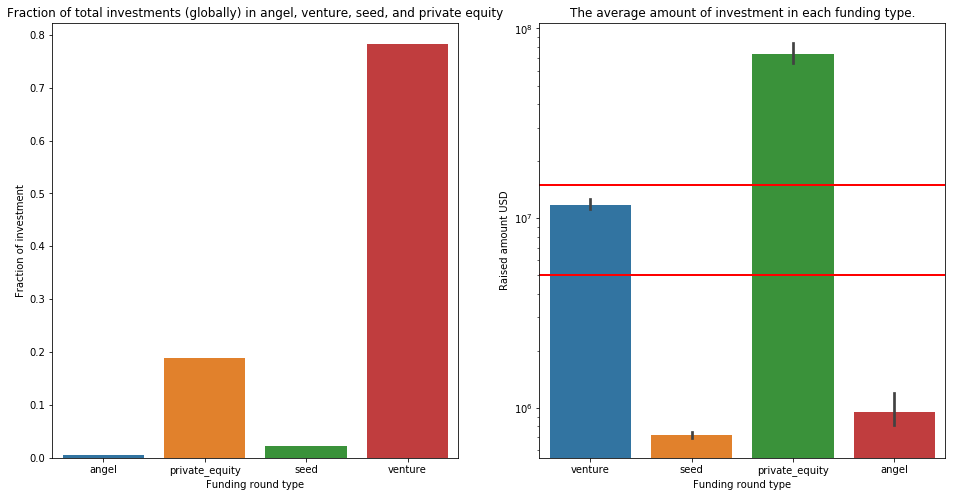

In [111]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sns.barplot(x='funding_round_type', y='fraction_of_invest', data=fraction_investment)
plt.xlabel("Funding round type")
plt.ylabel("Fraction of investment")
plt.title("Fraction of total investments (globally) in angel, venture, seed, and private equity")

plt.subplot(1,2,2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data= master_frame, estimator=mean)
plt.yscale('log')
plt.axhline(y=5e+6, linewidth=2, color='r')
plt.axhline(y=15e+6, linewidth=2, color='r')
plt.xlabel('Funding round type')
plt.ylabel('Raised amount USD')
plt.title('The average amount of investment in each funding type.')

plt.show()

From the above box plot, we can clearly see the average investments for each Funding round type (venture, seed, angel, private equity)

Clearly venture funding round type has average investment between 5 to 15 million USD ans is most suitable funding round type for Spark funds.

** The top 9 countries against the total amount of investments of funding type FT.**

Top 9 countries where maximum investment happens are:

In [112]:
top9_countries = top9.groupby(by=['country_code']).sum().sort_values(by=['raised_amount_usd'], ascending=False)[0:9]
top9_countries.dropna(subset=['raised_amount_usd'], inplace=True)
top9_countries.reset_index(level=0, inplace=True)
top9_countries

,country_code,raised_amount_usd
0,USA,2.158499e+11
1,GBR,1.142338e+10
2,CAN,6.756630e+09
3,IND,5.654659e+09
4,ISR,5.393015e+09
5,IRL,1.205988e+09
6,SGP,1.119768e+09
7,AUS,9.532580e+08
8,NZL,2.323164e+08


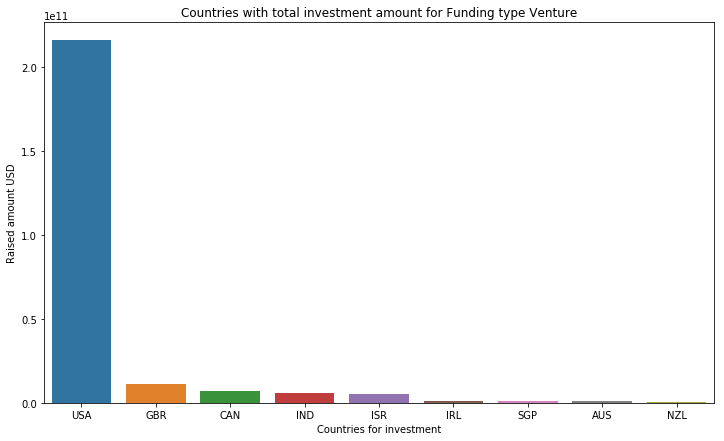

In [113]:
plt.figure(figsize=(12,7))


sns.barplot(x="country_code", y="raised_amount_usd", data=top9_countries);
plt.xlabel('Countries for investment')
plt.ylabel('Raised amount USD')
plt.title('Countries with total investment amount for Funding type Venture')

plt.show()

Above plot shows the top 9 countries against the total amount of investments of funding type Venture. It is very clear that USA (United States), GBR (Great Britain) and CAN (Canada) are the top destinations for investments.

 ** The number of investments in the top 3 sectors of the top 3 countries **

In [114]:
top3_countries = final_main_frame[(final_main_frame.country_code.isin(['USA', 'GBR', 'CAN'])) & (final_main_frame.main_sector.isin(['Others', 'Social, Finance, Analytics, Advertising', 'Cleantech / Semiconductors']))  & (final_main_frame.funding_round_type == 'venture')]
main_sector_count = pd.DataFrame(top3_countries.groupby(by = ['country_code','main_sector'])['company_permalink'].count())
main_sector_count.reset_index(inplace=True)
main_sector_count.rename(columns={'company_permalink': 'Total_count_of_investment'}, inplace=True)
main_sector_count

,country_code,main_sector,Total_count_of_investment
0,CAN,Cleantech / Semiconductors,312
1,CAN,Others,312
2,CAN,"Social, Finance, Analytics, Advertising",212
3,GBR,Cleantech / Semiconductors,394
4,GBR,Others,488
5,GBR,"Social, Finance, Analytics, Advertising",394
6,USA,Cleantech / Semiconductors,6987
7,USA,Others,7770
8,USA,"Social, Finance, Analytics, Advertising",6671


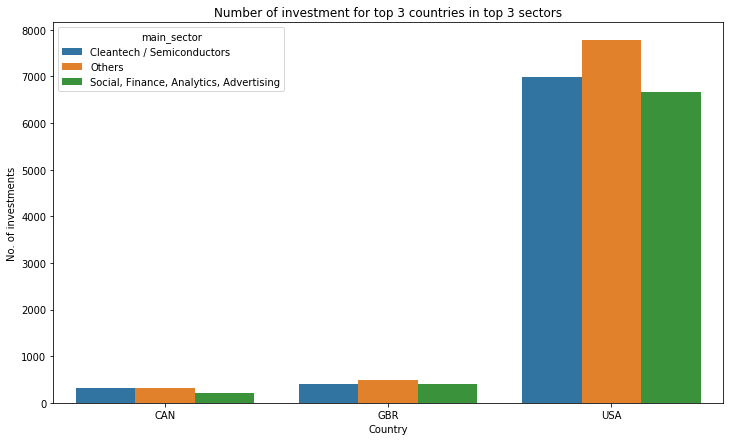

In [115]:
plt.figure(figsize=(12,7))

sns.barplot(x='country_code', y='Total_count_of_investment', hue="main_sector", data= main_sector_count)
plt.xlabel('Country')
plt.ylabel('No. of investments')
plt.title('Number of investment for top 3 countries in top 3 sectors')

plt.show()

Above plot clearly display the top 3 sectors each in USA, Great Britain (GBR), and Canada.

# Conclusion

Based on the Investment Type, Country and Sector analysis,
-  “**Venture**” funding round type is recommended to Spark Funds for investments between 5-15 million dollar.
-  Spark Funds should invest in **United States of America (USA), Great Britain (GBR) and Canada (CAN)** as these are the top 3 countries where most investments are happening.
-  **Cleantech/Semiconductor sector** is slightly ahead in total number of investments where as **Social, Finance, Analytics , Advertising sector** is slightly ahead in amount of investments.
-  Spark Funds can invest in any of **Cleantech/Semiconductor Or Social, Finance, Analytics , Advertising sectors** as both have nearly same number of investments and investment amounts. 